## Exercise 4
Let's dive into the serious business now!

### Description
[Kaggle](http://www.kagle.com/) is a great platform to learn machine learning. They offer free datasets and organize competitions around them. You can even be paid if you win one of them!

Now that you know how to build a classifier, try with [the titanic dataset!](https://www.kaggle.com/c/titanic).

### Steps
1. Download the dataset.
2. Import it in a jupyter notebook.
3. Analyse the data.
4. Divide the dataset. (train data and test data)
5. Build a classifier using the algorithm of you choice and fit it with your train data.
6. Evaluate the model with your test data.
7. When you're satisfied with the result, fit your model with the complete dataset.
8. Predict the Kaggle's test set and [submit your prediciton](https://www.kaggle.com/c/titanic/overview).
9. Which score did you get?

**DISCLAIMER:** If you look at Kaggle's leaderboard, you will see a lot of people have a score of 100%. They just found the name of people that survived online. Great lesson here, when you are learning something, never compare yourself to others. All that matters is what you've learned.

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [39]:
gender_submission = pd.read_csv('/home/regis/Desktop/ANT-Theano-2-27_regression_classification/4.machine_learning/assets/gender_submission.csv') 

In [40]:
test = pd.read_csv('/home/regis/Desktop/ANT-Theano-2-27_regression_classification/4.machine_learning/assets/test.csv') 

In [41]:
train = pd.read_csv('/home/regis/Desktop/ANT-Theano-2-27_regression_classification/4.machine_learning/assets/train.csv') 

In [42]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [43]:
print(gender_submission.shape)
for col in gender_submission:
    print(col)
    print(type(col))
    print(f'NaN values: {gender_submission[col].isnull().sum()}')
    print(f'number of unique values: {gender_submission[col].nunique()}')
    print(f'unique values: {gender_submission[col].unique()}')
    print('==========')

(418, 2)
PassengerId
<class 'str'>
NaN values: 0
number of unique values: 418
unique values: [ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070

In [44]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


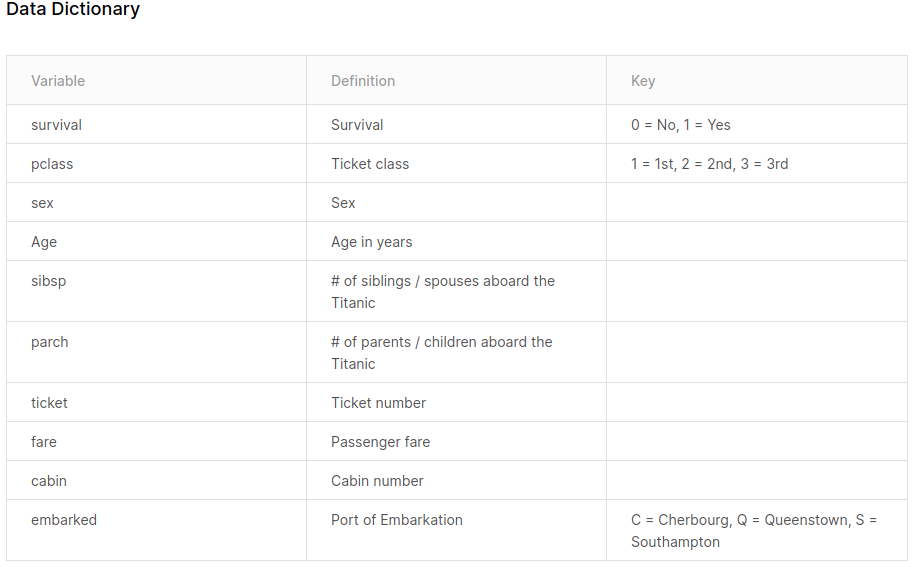

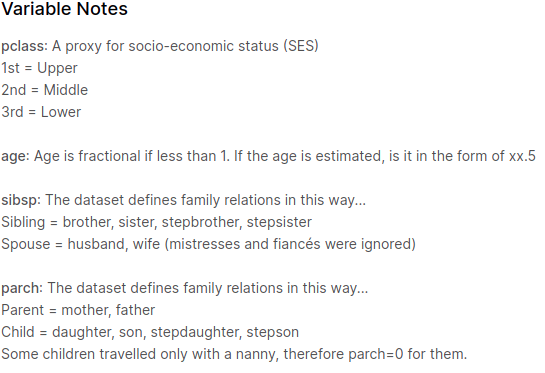

In [45]:
print(test.shape)
for col in test:
    print(col)
    print(type(col))
    print(f'NaN values: {test[col].isnull().sum()}')
    print(f'number of unique values: {test[col].nunique()}')
    print(f'unique values: {test[col].unique()}')
    print('==========')

(418, 11)
PassengerId
<class 'str'>
NaN values: 0
number of unique values: 418
unique values: [ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 107

## Things to change when looking at output above
<ul>
<li>PassengerId : from string to int</li>
<li>Pclass : from string to int</li>    
<li>Name : what does 'Wilkes, Mrs. James (Ellen Needs)' mean? Is ellen spouse, nany?</li>
<li>Sex : OK </li>    
<li>Age : from string to float + NaN values: 86 </li>
<li>SibSp : from string to int </li>    
<li>Ticket : two types of data '2692' and 'STON/O2. 3101270' </li>  
<li>Fare : from string to float + NaN values: 1  </li>  
<li>Cabin : NaN values: 327 + C23 C25 C27, B45, F G63 will need some cleaning with regex</li>
<li>Embarked : OK</li>     
</ul>

In [46]:
columns=['PassengerId','Pclass','SibSp']
for col in columns:
    test[col] = test[col].astype(int)

In [47]:
columns=['Age','Fare']
for col in columns:
    test[col] = test[col].astype(float)

In [48]:
test.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

all types fixed

## Things left to change
<ul>
<li>Name : what does 'Wilkes, Mrs. James (Ellen Needs)' mean? Is ellen spouse, nany?</li>   
<li>Age : NaN values: 86 </li>   
<li>Ticket : two types of data '2692' and 'STON/O2. 3101270' </li>  
<li>Fare : NaN values: 1  </li>  
<li>Cabin : NaN values: 327 + C23 C25 C27, B45, F G63 will need some cleaning with regex</li>    
</ul>

In [49]:
print(test['Name'].nunique())
print(test['Name'].unique())

418
['Kelly, Mr. James' 'Wilkes, Mrs. James (Ellen Needs)'
 'Myles, Mr. Thomas Francis' 'Wirz, Mr. Albert'
 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)'
 'Svensson, Mr. Johan Cervin' 'Connolly, Miss. Kate'
 'Caldwell, Mr. Albert Francis'
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)' 'Davies, Mr. John Samuel'
 'Ilieff, Mr. Ylio' 'Jones, Mr. Charles Cresson'
 'Snyder, Mrs. John Pillsbury (Nelle Stevenson)' 'Howard, Mr. Benjamin'
 'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)'
 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)' 'Keane, Mr. Daniel'
 'Assaf, Mr. Gerios' 'Ilmakangas, Miss. Ida Livija'
 'Assaf Khalil, Mrs. Mariana (Miriam")"' 'Rothschild, Mr. Martin'
 'Olsen, Master. Artur Karl' 'Flegenheim, Mrs. Alfred (Antoinette)'
 'Williams, Mr. Richard Norris II'
 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)'
 'Robins, Mr. Alexander A' 'Ostby, Miss. Helene Ragnhild'
 'Daher, Mr. Shedid' 'Brady, Mr. John Bertram' 'Samaan, Mr. Elias'
 'Louch, Mr. Charles Alexander' 'Jefferys, 

- try to find if names between () are in the names column
- remove all unnecessary "

In [50]:
test['Name'].replace('"', '', inplace=True)

In [51]:
print(test['Name'].nunique())
print(test['Name'].unique())

418
['Kelly, Mr. James' 'Wilkes, Mrs. James (Ellen Needs)'
 'Myles, Mr. Thomas Francis' 'Wirz, Mr. Albert'
 'Hirvonen, Mrs. Alexander (Helga E Lindqvist)'
 'Svensson, Mr. Johan Cervin' 'Connolly, Miss. Kate'
 'Caldwell, Mr. Albert Francis'
 'Abrahim, Mrs. Joseph (Sophie Halaut Easu)' 'Davies, Mr. John Samuel'
 'Ilieff, Mr. Ylio' 'Jones, Mr. Charles Cresson'
 'Snyder, Mrs. John Pillsbury (Nelle Stevenson)' 'Howard, Mr. Benjamin'
 'Chaffee, Mrs. Herbert Fuller (Carrie Constance Toogood)'
 'del Carlo, Mrs. Sebastiano (Argenia Genovesi)' 'Keane, Mr. Daniel'
 'Assaf, Mr. Gerios' 'Ilmakangas, Miss. Ida Livija'
 'Assaf Khalil, Mrs. Mariana (Miriam")"' 'Rothschild, Mr. Martin'
 'Olsen, Master. Artur Karl' 'Flegenheim, Mrs. Alfred (Antoinette)'
 'Williams, Mr. Richard Norris II'
 'Ryerson, Mrs. Arthur Larned (Emily Maria Borie)'
 'Robins, Mr. Alexander A' 'Ostby, Miss. Helene Ragnhild'
 'Daher, Mr. Shedid' 'Brady, Mr. John Bertram' 'Samaan, Mr. Elias'
 'Louch, Mr. Charles Alexander' 'Jefferys, 

In [56]:
test['full_name']=test['Name']

In [57]:
test['full_name']

0                                  Kelly, Mr. James
1                  Wilkes, Mrs. James (Ellen Needs)
2                         Myles, Mr. Thomas Francis
3                                  Wirz, Mr. Albert
4      Hirvonen, Mrs. Alexander (Helga E Lindqvist)
                           ...                     
413                              Spector, Mr. Woolf
414                    Oliva y Ocana, Dona. Fermina
415                    Saether, Mr. Simon Sivertsen
416                             Ware, Mr. Frederick
417                        Peter, Master. Michael J
Name: full_name, Length: 418, dtype: object

seperate full name from name

In [58]:
for i in range(len(test.Name)):
    name=test.loc[i,'Name']
    if '(' in name:
        start=name.find('(')
        #print(start)
        #print(type(start))
        end=name.find(')')
        #print(end)
        #print(type(end))
        #print(i[start+1:end])
        test.loc[i,'full_name']=name[start+1:end]
    #else:
     #   test['full_name']='None'

In [61]:
test['full_name']

0                  Kelly, Mr. James
1                       Ellen Needs
2         Myles, Mr. Thomas Francis
3                  Wirz, Mr. Albert
4                 Helga E Lindqvist
                   ...             
413              Spector, Mr. Woolf
414    Oliva y Ocana, Dona. Fermina
415    Saether, Mr. Simon Sivertsen
416             Ware, Mr. Frederick
417        Peter, Master. Michael J
Name: full_name, Length: 418, dtype: object

remove full name between () from Name

In [64]:
for i in range(len(test.Name)):
    name=test.loc[i,'Name']
    if '(' in name:
        end=name.find('(')
        
        test.loc[i,'Name']=name[:end]
    #else:
     #   test['full_name']='None'

In [65]:
test['Name']

0                  Kelly, Mr. James
1               Wilkes, Mrs. James 
2         Myles, Mr. Thomas Francis
3                  Wirz, Mr. Albert
4         Hirvonen, Mrs. Alexander 
                   ...             
413              Spector, Mr. Woolf
414    Oliva y Ocana, Dona. Fermina
415    Saether, Mr. Simon Sivertsen
416             Ware, Mr. Frederick
417        Peter, Master. Michael J
Name: Name, Length: 418, dtype: object

In [66]:
print(test['Name'].nunique())
print(test['Name'].unique())

418
['Kelly, Mr. James' 'Wilkes, Mrs. James ' 'Myles, Mr. Thomas Francis'
 'Wirz, Mr. Albert' 'Hirvonen, Mrs. Alexander '
 'Svensson, Mr. Johan Cervin' 'Connolly, Miss. Kate'
 'Caldwell, Mr. Albert Francis' 'Abrahim, Mrs. Joseph '
 'Davies, Mr. John Samuel' 'Ilieff, Mr. Ylio' 'Jones, Mr. Charles Cresson'
 'Snyder, Mrs. John Pillsbury ' 'Howard, Mr. Benjamin'
 'Chaffee, Mrs. Herbert Fuller ' 'del Carlo, Mrs. Sebastiano '
 'Keane, Mr. Daniel' 'Assaf, Mr. Gerios' 'Ilmakangas, Miss. Ida Livija'
 'Assaf Khalil, Mrs. Mariana ' 'Rothschild, Mr. Martin'
 'Olsen, Master. Artur Karl' 'Flegenheim, Mrs. Alfred '
 'Williams, Mr. Richard Norris II' 'Ryerson, Mrs. Arthur Larned '
 'Robins, Mr. Alexander A' 'Ostby, Miss. Helene Ragnhild'
 'Daher, Mr. Shedid' 'Brady, Mr. John Bertram' 'Samaan, Mr. Elias'
 'Louch, Mr. Charles Alexander' 'Jefferys, Mr. Clifford Thomas'
 'Dean, Mrs. Bertram ' 'Johnston, Mrs. Andrew G '
 'Mock, Mr. Philipp Edmund' 'Katavelas, Mr. Vassilios '
 'Roth, Miss. Sarah A' 'Cacic, 

In [ ]:
print(test['Name'].nunique())
print(test['Name'].unique())

In [77]:
test['full_name'] = test['Name'][i.find('('):i.find(')')].where('(' in test['Name'])

ValueError: Array conditional must be same shape as self

In [78]:
for i in range(len(test.Name)):
    if '(' in :
        start=i.find('(')
        #print(start)
        #print(type(start))
        end=i.find(')')
        #print(end)
        #print(type(end))
        #print(i[start+1:end])
        test['full_name']=i[start+1:end]
    else:
        test['full_name']='None'

In [70]:
print(test.shape)
for col in test:
    print(col)
    print(type(col))
    print(f'NaN values: {test[col].isnull().sum()}')
    print(f'number of unique values: {test[col].nunique()}')
    print(f'unique values: {test[col].unique()}')
    print('==========')

(418, 12)
PassengerId
<class 'str'>
NaN values: 0
number of unique values: 418
unique values: [ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 107

In [68]:
i='Hirvonen, Mrs. Alexander (Helga E Lindqvist)'
if '(' in i:
    start=i.find('(')
    #print(start)
    #print(type(start))
    end=i.find(')')
    #print(end)
    #print(type(end))
    #print(i[start+1:end])
    test['full_name']=i[start+1:end]
else:
    test['full_name']=test['Name']